## Create Lat and Long Combinations (Module 6.1.4)

In [20]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import linear regression
from scipy.stats import linregress

In [2]:
# Create a set of random latitudes and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

## Generate Random World Cities (6.1.5)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

592

## Get the City Weather Data (Module 6.2.6)

In [6]:
# Import tjhe time library and datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | charyshskoye
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | tautira
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | paamiut
Processing Record 13 of Set 1 | karakendzha
City not found. Skipping...
Processing Record 14 of Set 1 | erenhot
Processing Record 15 of Set 1 | praia
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | merauke
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | esperance

Processing Record 37 of Set 4 | geraldton
Processing Record 38 of Set 4 | chagda
City not found. Skipping...
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | oktyabrskiy
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | sri aman
Processing Record 43 of Set 4 | pontianak
Processing Record 44 of Set 4 | san francisco menendez
Processing Record 45 of Set 4 | sorvag
City not found. Skipping...
Processing Record 46 of Set 4 | mananjary
Processing Record 47 of Set 4 | bonthe
Processing Record 48 of Set 4 | moron
Processing Record 49 of Set 4 | nanortalik
Processing Record 50 of Set 4 | sinnamary
Processing Record 1 of Set 5 | iracoubo
Processing Record 2 of Set 5 | hefei
Processing Record 3 of Set 5 | gravelbourg
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 6 of Set 5 | dalumangcob
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | rundu
Proces

Processing Record 23 of Set 8 | yomitan
City not found. Skipping...
Processing Record 24 of Set 8 | trat
Processing Record 25 of Set 8 | mar del plata
Processing Record 26 of Set 8 | ahuimanu
Processing Record 27 of Set 8 | aguimes
Processing Record 28 of Set 8 | san vicente
Processing Record 29 of Set 8 | tumaco
Processing Record 30 of Set 8 | tshikapa
Processing Record 31 of Set 8 | kushmurun
Processing Record 32 of Set 8 | pasighat
Processing Record 33 of Set 8 | nabire
Processing Record 34 of Set 8 | viedma
Processing Record 35 of Set 8 | batsfjord
Processing Record 36 of Set 8 | quepos
Processing Record 37 of Set 8 | boulder
Processing Record 38 of Set 8 | westport
Processing Record 39 of Set 8 | pisco
Processing Record 40 of Set 8 | arman
Processing Record 41 of Set 8 | bor
Processing Record 42 of Set 8 | meghri
Processing Record 43 of Set 8 | tuburan
Processing Record 44 of Set 8 | imbituba
Processing Record 45 of Set 8 | wucheng
Processing Record 46 of Set 8 | karaul
City not f

Processing Record 10 of Set 12 | cairns
Processing Record 11 of Set 12 | augusto correa
Processing Record 12 of Set 12 | enugu
Processing Record 13 of Set 12 | lichinga
Processing Record 14 of Set 12 | batabano
Processing Record 15 of Set 12 | lyantonde
Processing Record 16 of Set 12 | ust-kut
Processing Record 17 of Set 12 | ulladulla
Processing Record 18 of Set 12 | marcona
City not found. Skipping...
Processing Record 19 of Set 12 | chandler
Processing Record 20 of Set 12 | cockburn town
Processing Record 21 of Set 12 | lavrentiya
Processing Record 22 of Set 12 | beloha
Processing Record 23 of Set 12 | bonavista
Processing Record 24 of Set 12 | thunder bay
Processing Record 25 of Set 12 | udachnyy
Processing Record 26 of Set 12 | geaca
Processing Record 27 of Set 12 | manadhoo
Processing Record 28 of Set 12 | carbonia
Processing Record 29 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 30 of Set 12 | yermakovskoye
Processing Record 31 of Set 12 | north myrtle beach

## Create a DataFrame of City Weather Data (Module 6.2.7)

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,79.05,73,40,6.91,MU,2021-11-25 15:45:05
1,Rikitea,-23.1203,-134.9692,75.49,77,13,13.20,PF,2021-11-25 15:45:05
2,Charyshskoye,51.3978,83.5598,38.46,95,100,14.12,RU,2021-11-25 15:45:05
3,Punta Arenas,-53.1500,-70.9167,53.71,50,40,28.77,CL,2021-11-25 15:45:06
4,Barrow,71.2906,-156.7887,-9.38,77,1,17.27,US,2021-11-25 15:41:58
5,Ponta Do Sol,32.6667,-17.1000,68.72,61,89,3.67,PT,2021-11-25 15:45:07
6,Tautira,-17.7333,-149.1500,77.02,75,40,15.41,PF,2021-11-25 15:45:08
7,Yellowknife,62.4560,-114.3525,6.42,91,75,5.01,CA,2021-11-25 15:40:40
8,Provideniya,64.3833,-173.3000,-0.78,82,57,7.18,RU,2021-11-25 15:45:08
9,Kaitangata,-46.2817,169.8464,57.25,53,100,6.96,NZ,2021-11-25 15:45:08


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2021-11-25 15:45:05,-20.3428,57.7575,79.05,73,40,6.91
1,Rikitea,PF,2021-11-25 15:45:05,-23.1203,-134.9692,75.49,77,13,13.20
2,Charyshskoye,RU,2021-11-25 15:45:05,51.3978,83.5598,38.46,95,100,14.12
3,Punta Arenas,CL,2021-11-25 15:45:06,-53.1500,-70.9167,53.71,50,40,28.77
4,Barrow,US,2021-11-25 15:41:58,71.2906,-156.7887,-9.38,77,1,17.27
...,...,...,...,...,...,...,...,...,...
529,Hami,CN,2021-11-25 17:05:17,42.8000,93.4500,28.00,62,11,4.14
530,Kapuskasing,CA,2021-11-25 17:05:17,49.4169,-82.4331,15.01,86,100,10.04
531,Sola,VU,2021-11-25 17:05:18,-13.8833,167.5500,79.79,77,64,20.54
532,Linkou,CN,2021-11-25 17:05:18,45.3000,130.2833,5.04,95,39,3.40


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs Temperature (Module 6.3.1)

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

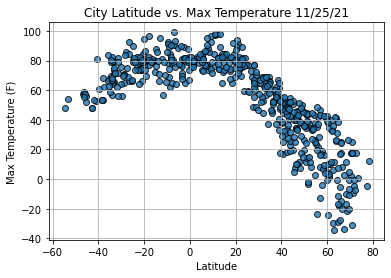

In [16]:
# Import time module
import time

# Build the scatterplot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# graph formatting
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()

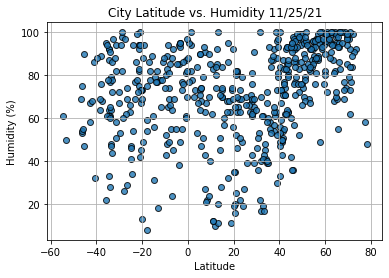

In [17]:
# Build the scatterplot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# graph formatting
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

plt.show()

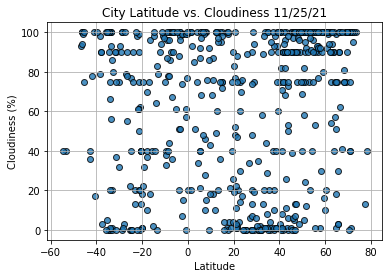

In [18]:
# Build the scatterplot for lat vs Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# graph formatting
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

plt.show()

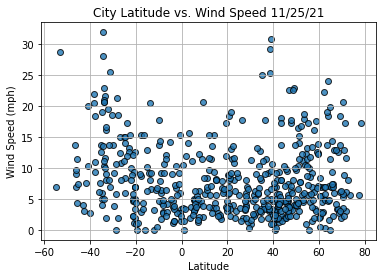

In [19]:
# Build the scatterplot for lat vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# graph formatting
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

plt.show()

## Find thje Correlation between lat and max temp (Module 6.4.2)

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    
    print(f"The p-value is: {p_value:.3f} and the r-value is: {r_value:.3f}")

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Praia
Country                        CV
Date          2021-11-25 15:45:10
Lat                       14.9215
Lng                      -23.5087
Max Temp                    84.74
Humidity                       70
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [25]:
# Make a new dataframe for northern hemisphere cities and the southern hemisphere cities
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

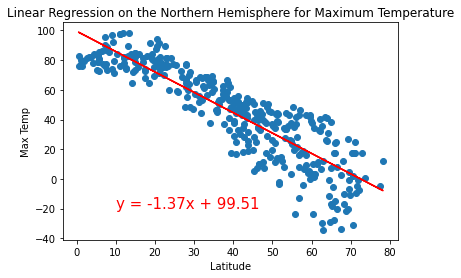

The p-value is: 0.000 and the r-value is: -0.880


In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature",
                      "Max Temp", (10,-20))

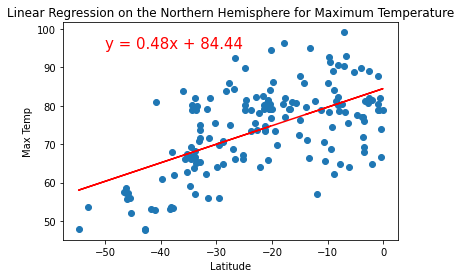

The p-value is: 0.000 and the r-value is: 0.587


In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for Maximum Temperature",
                      "Max Temp", (-50, 95))

### Lat vs Humidity

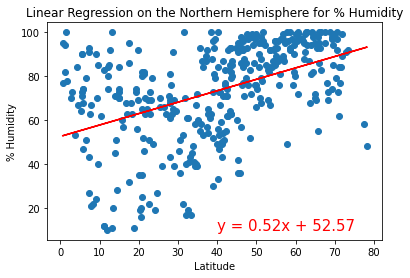

The p-value is: 0.000 and the r-value is: 0.459


In [43]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for % Humidity",
                      "% Humidity", (40,10))

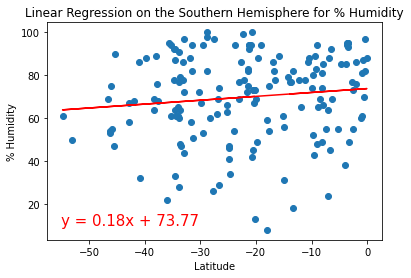

The p-value is: 0.125 and the r-value is: 0.120


In [45]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Humidity",
                      "% Humidity", (-55,10))

### Lat vs Cloudiness

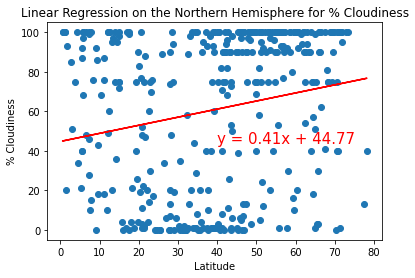

The p-value is: 0.000 and the r-value is: 0.203


In [49]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for % Cloudiness",
                      "% Cloudiness", (40,44))

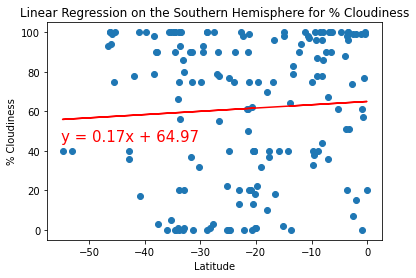

The p-value is: 0.442 and the r-value is: 0.060


In [51]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Cloudiness",
                      "% Cloudiness", (-55,45))

### Lat vs Wind Speed

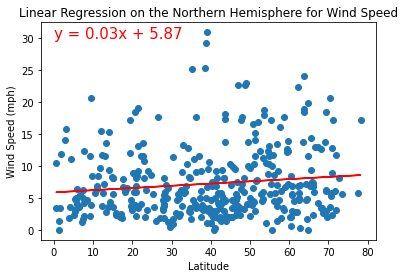

The p-value is: 0.016 and the r-value is: 0.125


In [54]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for Wind Speed",
                      "Wind Speed (mph)", (0,30))

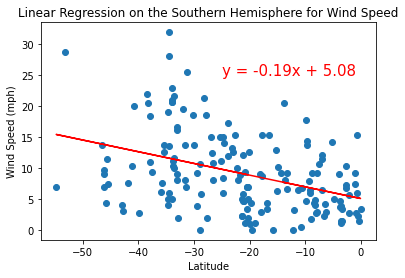

The p-value is: 0.000 and the r-value is: -0.394


In [58]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Wind Speed",
                      "Wind Speed (mph)", (-25, 25))